In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from numpy import log
from pandas import Series

In [3]:
# importing dataset
df = pd.read_csv("TATAMOTORS.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551.0
1,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
2,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
3,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816742,7979598.0
4,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0


# Pre-requisite rule in TSF

- Ensure that all data are represented as numerical, rather than categorical labels or text

- Verify the correct data types for each columns, ensuring that datetime columns and the target variable are numeric

- Check for any missing data points, if any are found, fill them in using an appropriate imputation method before proceeding with TSF

- Arrange the data in sequential order, with timestamps or indices sorted in ascending order. 

- Assess the data for the presence of trend, seasonality, errors or any sudden unexpected changes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2360 non-null   object 
 1   Open       2359 non-null   float64
 2   High       2359 non-null   float64
 3   Low        2359 non-null   float64
 4   Close      2359 non-null   float64
 5   Adj Close  2359 non-null   float64
 6   Volume     2359 non-null   float64
dtypes: float64(6), object(1)
memory usage: 129.2+ KB


In [8]:
df.shape

(2360, 7)

In [12]:
df = df.dropna()

In [14]:
df.shape

(2359, 7)

In [16]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2359 entries, 0 to 2359
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2359 non-null   datetime64[ns]
 1   Open       2359 non-null   float64       
 2   High       2359 non-null   float64       
 3   Low        2359 non-null   float64       
 4   Close      2359 non-null   float64       
 5   Adj Close  2359 non-null   float64       
 6   Volume     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 147.4 KB


In [20]:
df.duplicated().sum()

0

In [22]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Durbin Watson Test

In [25]:
import statsmodels.api as sm
sm.stats.durbin_watson(df['Open'])

0.0004248381601064135

In [27]:
sm.stats.durbin_watson(df['Close'])

0.0004477992393896222

In [29]:
sm.stats.durbin_watson(df['Volume'])

0.2703755678323773

In [31]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2.359000e+03
mean,396.935476,402.071841,390.850512,396.191792,394.019840,2.379846e+07
std,202.390842,203.981276,200.188434,202.152701,201.610486,3.053952e+07
min,66.500000,66.900002,63.500000,65.300003,64.896851,9.445510e+05
25%,258.250000,261.700012,252.525002,258.100006,256.506515,7.342951e+06
50%,404.549988,409.899994,398.149994,403.649994,401.157928,1.242660e+07
75%,481.774994,487.725006,474.674988,481.399994,478.405532,2.733780e+07
max,1038.000000,1094.000000,1030.400024,1090.949951,1090.949951,3.905778e+08


In [33]:
df.nunique()

Date         2359
Open         1880
High         2051
Low          2054
Close        2117
Adj Close    2172
Volume       2359
dtype: int64

<AxesSubplot: >

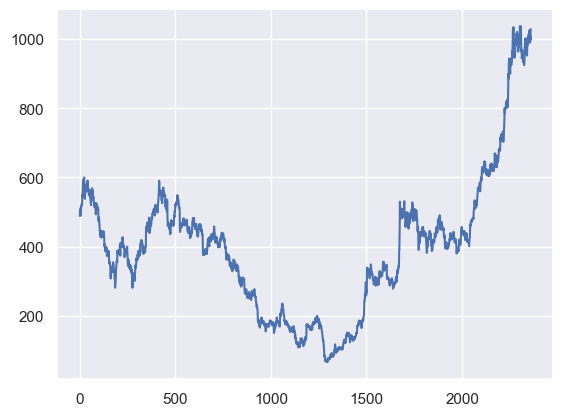

In [35]:
df['Open'].plot()

In [37]:
df['Time_Stamp'] = pd.DataFrame(df, columns=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Time_Stamp
0,2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551.0,2015-01-01
1,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0,2015-01-02
2,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0,2015-01-05
3,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816742,7979598.0,2015-01-06
4,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0,2015-01-07


In [39]:
df_final_model = df.set_index('Time_Stamp')
df_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2015-01-01,2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551.0
2015-01-02,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
2015-01-05,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2015-01-06,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816742,7979598.0
2015-01-07,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0


In [41]:
df_final_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2359 entries, 2015-01-01 to 2024-07-25
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2359 non-null   datetime64[ns]
 1   Open       2359 non-null   float64       
 2   High       2359 non-null   float64       
 3   Low        2359 non-null   float64       
 4   Close      2359 non-null   float64       
 5   Adj Close  2359 non-null   float64       
 6   Volume     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 147.4 KB


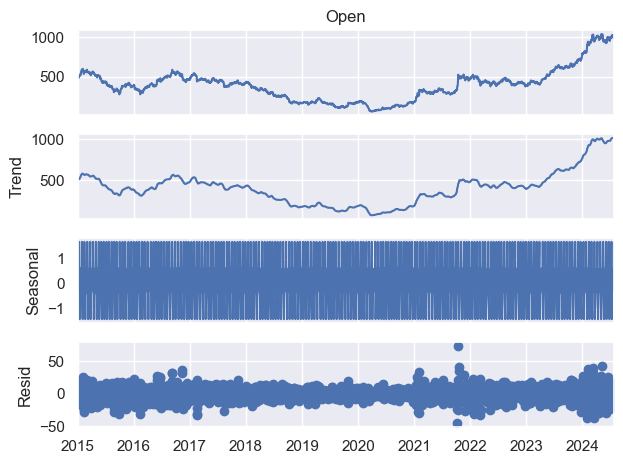

In [43]:
# Decomposition to check dataset
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_final_model['Open'], period=12)
decompose.plot()
plt.show()

### Plot the boxplot of the 'Open' variable with respect to the different years

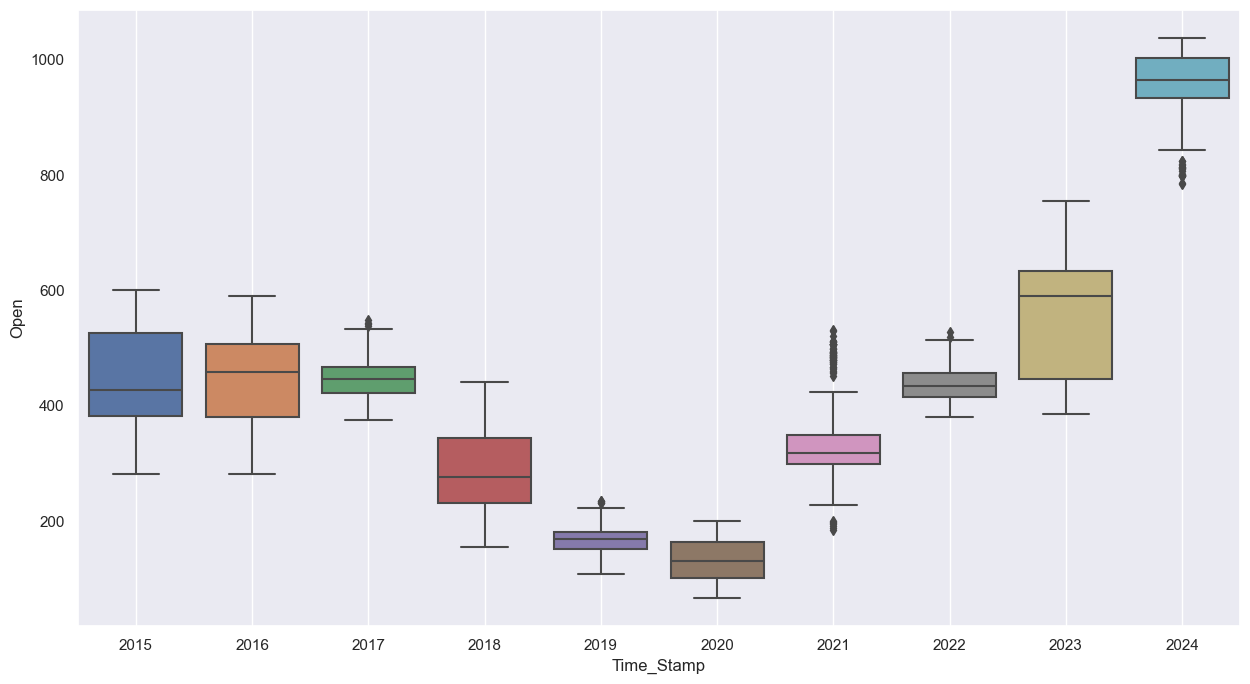

In [46]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_final_model.index.year, y = df_final_model['Open'])
plt.grid();

In [48]:
df_final_model.index.year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
           dtype='int64', name='Time_Stamp', length=2359)

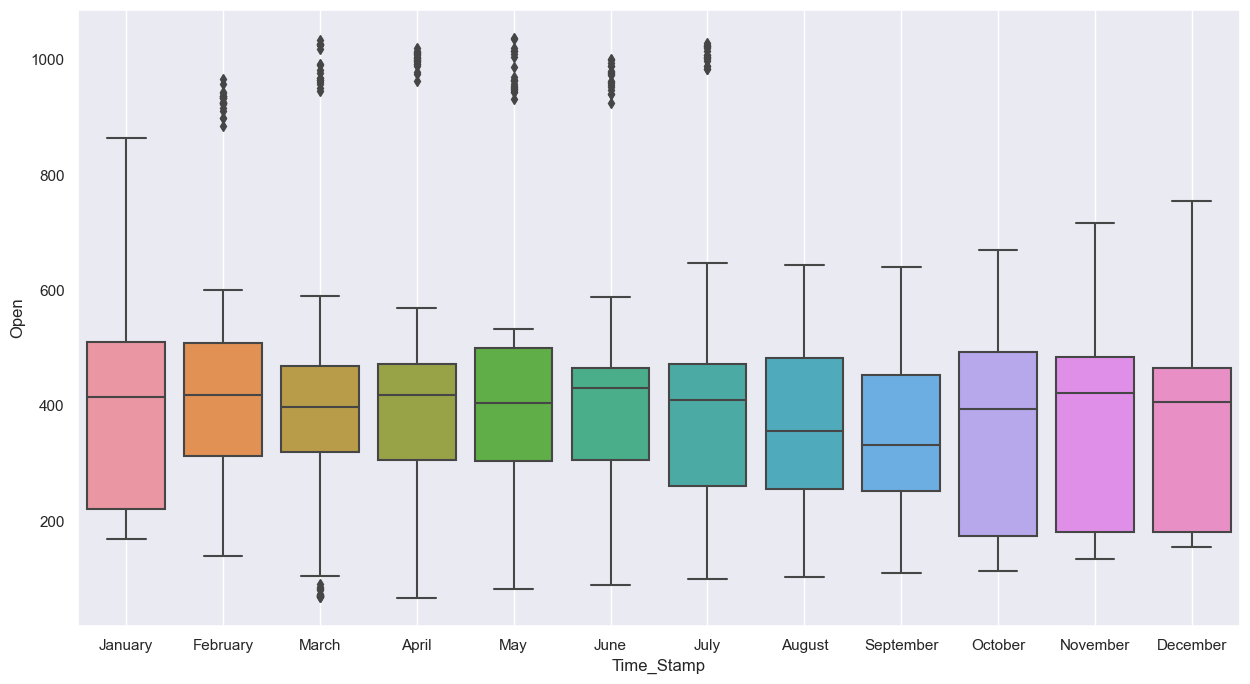

In [50]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_final_model.index.month_name(), y = df_final_model['Open'])
plt.grid();

### Augmented Dickey Fuller Test - To check time series data is stationary or not

In [53]:
from statsmodels.tsa.stattools import adfuller

In [55]:
adfuller(df_final_model['Open'])

(1.067663049228532,
 0.9949309676406137,
 0,
 2358,
 {'1%': -3.4331262650681884,
  '5%': -2.8627665066966537,
  '10%': -2.5674229225037246},
 16929.732322310592)

In [57]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test - To check data is Stationary or not")
    labels = ['ADF Stats', 'P-Values','#Lags', 'No of observation']
    for i, j in zip(result, labels):
        print(j + " :-> " + str(i))

    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak Evidence against null hypothes and my time series is Non-Stationary")

In [59]:
check_adftest(df_final_model['Open'])

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> 1.067663049228532
P-Values :-> 0.9949309676406137
#Lags :-> 0
No of observation :-> 2358
Weak Evidence against null hypothes and my time series is Non-Stationary


In [61]:
df_final_model['1st Diff'] = df_final_model['Open'] - df_final_model['Open'].shift(1)

In [63]:
df_final_model

,Date,Open,High,Low,Close,Adj Close,Volume,1st Diff
Time_Stamp,,,,,,,,
2015-01-01,2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551.0,NaN
2015-01-02,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0,2.720794
2015-01-05,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0,12.713654
2015-01-06,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816742,7979598.0,4.204895
2015-01-07,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0,-19.144653
...,...,...,...,...,...,...,...,...
2024-07-19,2024-07-19,1024.000000,1024.000000,986.650024,990.000000,990.000000,7400178.0,1.049988
2024-07-22,2024-07-22,990.000000,1008.000000,976.549988,1003.150024,1003.150024,7396198.0,-34.000000
2024-07-23,2024-07-23,1007.900024,1008.650024,967.200012,1001.799988,1001.799988,10384177.0,17.900024


In [65]:
check_adftest(df_final_model['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -47.723753374898074
P-Values :-> 0.0
#Lags :-> 0
No of observation :-> 2357
Strong evidence against null hypothesis and my time series is Stationary


In [67]:
# split the data into train and test
start_date = df_final_model.index.min()
end_date = df_final_model.index.max()
print("Start Date of Stock  :", start_date)
print("End Data of the Stock :", end_date)

Start Date of Stock  : 2015-01-01 00:00:00
End Data of the Stock : 2024-07-25 00:00:00


In [69]:
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2022-02-02')]
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2022-02-02')]

In [71]:
train.shape, test.shape

((1749, 8), (610, 8))

In [73]:
train_final = train[['1st Diff']]
test_final = test[['1st Diff']]

In [75]:
train_final

,1st Diff
Time_Stamp,
2015-01-01,NaN
2015-01-02,2.720794
2015-01-05,12.713654
2015-01-06,4.204895
2015-01-07,-19.144653
...,...
2022-01-25,-25.900024
2022-01-27,6.950012
2022-01-28,19.750000


In [77]:
test_final

,1st Diff
Time_Stamp,
2022-02-02,0.600006
2022-02-03,0.500000
2022-02-04,-5.300018
2022-02-07,-0.899994
2022-02-08,-4.899994
...,...
2024-07-19,1.049988
2024-07-22,-34.000000
2024-07-23,17.900024


In [79]:
check_adftest(train_final['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -10.840199450165997
P-Values :-> 1.623271892290407e-19
#Lags :-> 11
No of observation :-> 1736
Strong evidence against null hypothesis and my time series is Stationary


In [81]:
check_adftest(test_final['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -10.449660648780362
P-Values :-> 1.449284850707848e-18
#Lags :-> 6
No of observation :-> 603
Strong evidence against null hypothesis and my time series is Stationary


# Building Time Series Forecasting

### Facebook Prophet Model

In [86]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.2/13.3 MB 1.9 MB/s eta 0:00:07
   - -------------------------------------- 0.4/13.3 MB 2.9 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/13.3 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/13.3 MB 4.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.4/13.3 MB 5.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.7/13.3 MB 5.5 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/13.3 MB 5.8 MB/s eta 0:00:02
   ------- -------------------------------- 2.5/13.3 MB 6.1 MB/s eta 0:00:02
   -------- ------------------------------- 2.8/13.3 MB 6.2 MB/s eta 0:00:02
   --------- ------------------------------ 3.2/13.3 MB 6.4 MB/s eta 0:00:02
   ---------- ----------------------------- 3.5/13.3 MB 6.4 MB/s eta 0:00:02
   ----------

In [93]:
df_final_model

,Date,Open,High,Low,Close,Adj Close,Volume,1st Diff
Time_Stamp,,,,,,,,
2015-01-01,2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551.0,NaN
2015-01-02,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0,2.720794
2015-01-05,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0,12.713654
2015-01-06,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816742,7979598.0,4.204895
2015-01-07,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0,-19.144653
...,...,...,...,...,...,...,...,...
2024-07-19,2024-07-19,1024.000000,1024.000000,986.650024,990.000000,990.000000,7400178.0,1.049988
2024-07-22,2024-07-22,990.000000,1008.000000,976.549988,1003.150024,1003.150024,7396198.0,-34.000000
2024-07-23,2024-07-23,1007.900024,1008.650024,967.200012,1001.799988,1001.799988,10384177.0,17.900024


In [95]:
from prophet import Prophet
df_prophet = df_final_model.rename(columns={'Date':'ds','Open':'y'})
df_prophet

,ds,y,High,Low,Close,Adj Close,Volume,1st Diff
Time_Stamp,,,,,,,,
2015-01-01,2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551.0,NaN
2015-01-02,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0,2.720794
2015-01-05,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0,12.713654
2015-01-06,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816742,7979598.0,4.204895
2015-01-07,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0,-19.144653
...,...,...,...,...,...,...,...,...
2024-07-19,2024-07-19,1024.000000,1024.000000,986.650024,990.000000,990.000000,7400178.0,1.049988
2024-07-22,2024-07-22,990.000000,1008.000000,976.549988,1003.150024,1003.150024,7396198.0,-34.000000
2024-07-23,2024-07-23,1007.900024,1008.650024,967.200012,1001.799988,1001.799988,10384177.0,17.900024


In [97]:
m = Prophet()
model = m.fit(df_prophet)

21:38:50 - cmdstanpy - INFO - Chain [1] start processing
21:38:51 - cmdstanpy - INFO - Chain [1] done processing


In [99]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [101]:
# Last Date - 2024-07-25
future_global = model.make_future_dataframe(periods=180, freq='D')
future_global.tail(20)

,ds
2519,2025-01-02
2520,2025-01-03
2521,2025-01-04
2522,2025-01-05
2523,2025-01-06
2524,2025-01-07
2525,2025-01-08
2526,2025-01-09
2527,2025-01-10
2528,2025-01-11


In [103]:
len(df_prophet)

2359

In [105]:
len(future_global)

2539

In [107]:
len(future_global) - len(df_prophet)

180

In [109]:
prediction = model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,565.698582,505.381666,623.639277,565.698582,565.698582,-2.476043,-2.476043,-2.476043,5.919102,5.919102,5.919102,-8.395144,-8.395144,-8.395144,0.0,0.0,0.0,563.222539
1,2015-01-02,564.938488,495.497235,622.455201,564.938488,564.938488,-2.650493,-2.650493,-2.650493,5.126855,5.126855,5.126855,-7.777348,-7.777348,-7.777348,0.0,0.0,0.0,562.287996
2,2015-01-05,562.658208,501.750722,620.419688,562.658208,562.658208,0.049032,0.049032,0.049032,5.477040,5.477040,5.477040,-5.428008,-5.428008,-5.428008,0.0,0.0,0.0,562.707239
3,2015-01-06,561.898114,503.850335,621.764612,561.898114,561.898114,2.061160,2.061160,2.061160,6.546109,6.546109,6.546109,-4.484949,-4.484949,-4.484949,0.0,0.0,0.0,563.959274
4,2015-01-07,561.138021,504.083720,616.690644,561.138021,561.138021,0.979089,0.979089,0.979089,4.446180,4.446180,4.446180,-3.467090,-3.467090,-3.467090,0.0,0.0,0.0,562.117110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,2025-01-17,1135.093109,1075.174116,1222.631316,1090.886359,1173.224942,15.078700,15.078700,15.078700,5.126855,5.126855,5.126855,9.951845,9.951845,9.951845,0.0,0.0,0.0,1150.171809
2535,2025-01-18,1136.004382,1040.539110,1189.442944,1090.620669,1174.673706,-18.424926,-18.424926,-18.424926,-29.675955,-29.675955,-29.675955,11.251030,11.251030,11.251030,0.0,0.0,0.0,1117.579456
2536,2025-01-19,1136.915654,1076.692140,1225.821796,1091.200810,1175.902612,14.665907,14.665907,14.665907,2.160671,2.160671,2.160671,12.505237,12.505237,12.505237,0.0,0.0,0.0,1151.581562
2537,2025-01-20,1137.826927,1080.868888,1232.462602,1091.841184,1176.936408,19.179778,19.179778,19.179778,5.477040,5.477040,5.477040,13.702738,13.702738,13.702738,0.0,0.0,0.0,1157.006705


In [111]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [113]:
prediction[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(180)

,ds,yhat_lower,yhat_upper,yhat
2359,2024-07-26,932.097500,1046.754719,986.158838
2360,2024-07-27,892.246184,1017.324328,951.943869
2361,2024-07-28,926.063149,1044.687101,984.255113
2362,2024-07-29,928.635140,1046.811862,987.930397
2363,2024-07-30,926.784157,1045.434124,989.242441
...,...,...,...,...
2534,2025-01-17,1075.174116,1222.631316,1150.171809
2535,2025-01-18,1040.539110,1189.442944,1117.579456
2536,2025-01-19,1076.692140,1225.821796,1151.581562
2537,2025-01-20,1080.868888,1232.462602,1157.006705


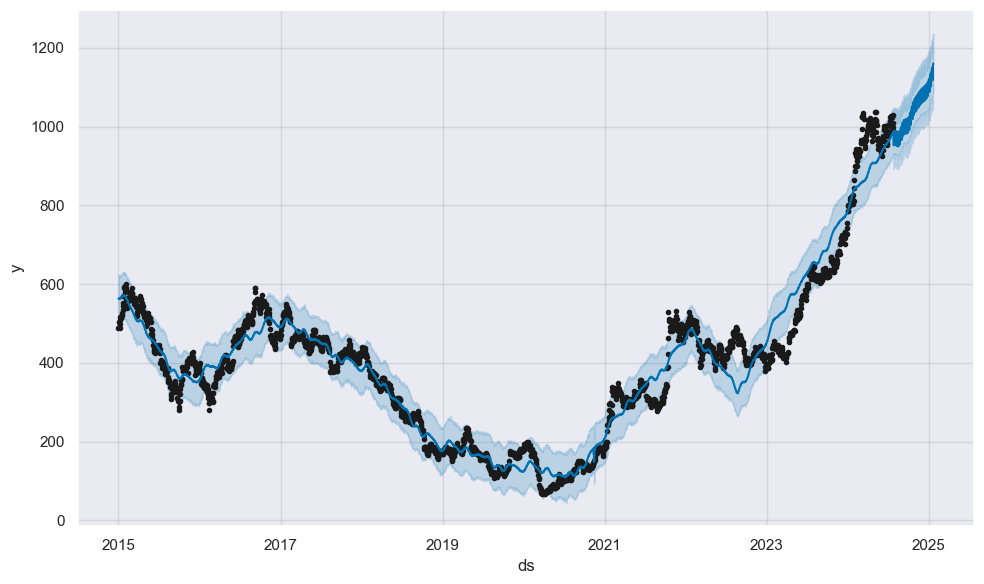

In [119]:
model.plot(prediction)
plt.show()

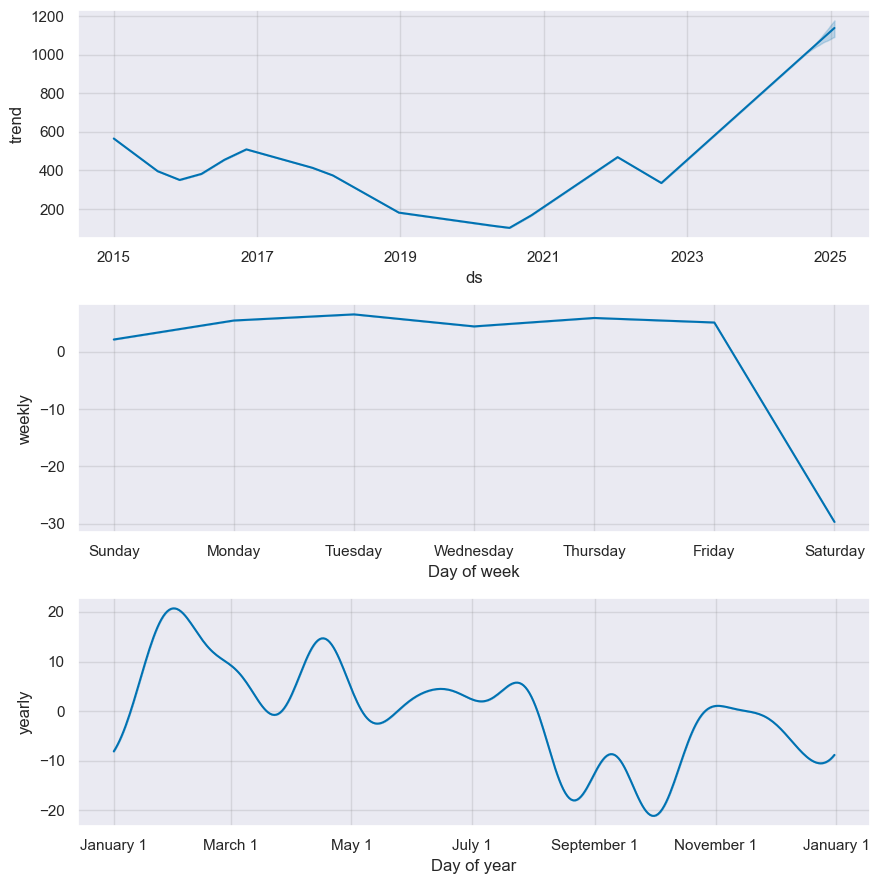

In [121]:
model.plot_components(prediction)
plt.show()